# Methods for Improving Neural Network Performance 

1) Early Stopping

2) Regularization (L1 and L2)

3) Dropout Layers

4) Reduce complexity or Increase Dataset

# Early Stopping Method

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout ###************
from tensorflow.keras.callbacks import EarlyStopping ########**************
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_circles

In [2]:
# Use the make_circles dataset from sklearn
x, y = make_circles(n_samples=100, noise = 0.1, random_state=1)

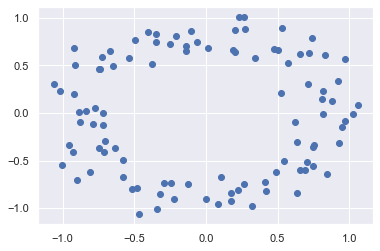

In [3]:
plt.scatter(x[:,0], x[:,1])

# Train Test Split

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Building Deep Neural Network without Early Stopping

In [5]:
model = Sequential()
model.add(Dense(256, input_dim=2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer ='adam', metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3500, verbose=0)

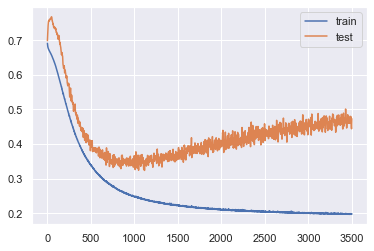

In [7]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [8]:
# Somewhere around 1000 epochs, the loss values stabilize. In fact it increases for Test Dataset.
# So we can use Early Stopping method to reduce the number of epochs to somewhere we get stable values

# Implementing Early Stopping Method

In [14]:
model2 = Sequential()
model2.add(Dense(256, input_dim=2, activation = 'relu'))
model2.add(Dense(256, activation = 'relu'))
model2.add(Dense(256, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer ='adam', metrics=['accuracy'])

In [15]:
callback = EarlyStopping(monitor='val_loss',    # Basis for Early Stopping
    min_delta=0.001,                          # Minimum change in monitor value
    patience=100,                                # Check for 25 consequent iterations
    verbose=1,                                  # 1 displays a message, 0 remains silent
    mode='auto',
    baseline=None,
    restore_best_weights=False)

In [16]:
history2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3500, callbacks = callback)

Epoch 1/3500
3/3 [==============================] - 0s 65ms/step - loss: 0.6909 - accuracy: 0.5125 - val_loss: 0.7128 - val_accuracy: 0.4500
Epoch 2/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.6832 - accuracy: 0.5125 - val_loss: 0.7306 - val_accuracy: 0.4500
Epoch 3/3500
3/3 [==============================] - 0s 13ms/step - loss: 0.6800 - accuracy: 0.4875 - val_loss: 0.7397 - val_accuracy: 0.3000
Epoch 4/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.6749 - accuracy: 0.5625 - val_loss: 0.7498 - val_accuracy: 0.3000
Epoch 5/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.6714 - accuracy: 0.5375 - val_loss: 0.7557 - val_accuracy: 0.3500
Epoch 6/3500
3/3 [==============================] - 0s 13ms/step - loss: 0.6701 - accuracy: 0.5500 - val_loss: 0.7591 - val_accuracy: 0.4000
Epoch 7/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.6666 - accuracy: 0.5500 - val_loss: 0.7637 - val_accuracy: 0.4000
Epoch 8/3500


Epoch 59/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.2935 - accuracy: 0.8500 - val_loss: 0.3082 - val_accuracy: 0.8500
Epoch 60/3500
3/3 [==============================] - 0s 13ms/step - loss: 0.2605 - accuracy: 0.8875 - val_loss: 0.3793 - val_accuracy: 0.8500
Epoch 61/3500
3/3 [==============================] - 0s 13ms/step - loss: 0.2323 - accuracy: 0.9250 - val_loss: 0.5560 - val_accuracy: 0.7500
Epoch 62/3500
3/3 [==============================] - 0s 13ms/step - loss: 0.2663 - accuracy: 0.9125 - val_loss: 0.4736 - val_accuracy: 0.8500
Epoch 63/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.2471 - accuracy: 0.9000 - val_loss: 0.3369 - val_accuracy: 0.8500
Epoch 64/3500
3/3 [==============================] - 0s 13ms/step - loss: 0.2592 - accuracy: 0.8875 - val_loss: 0.4370 - val_accuracy: 0.8000
Epoch 65/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.2375 - accuracy: 0.8875 - val_loss: 0.3881 - val_accuracy: 0.8500
Epoch 

3/3 [==============================] - 0s 13ms/step - loss: 0.1859 - accuracy: 0.9375 - val_loss: 0.4254 - val_accuracy: 0.8500
Epoch 117/3500
3/3 [==============================] - 0s 14ms/step - loss: 0.1868 - accuracy: 0.9250 - val_loss: 0.5190 - val_accuracy: 0.8500
Epoch 118/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.1892 - accuracy: 0.9250 - val_loss: 0.6451 - val_accuracy: 0.8000
Epoch 119/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.1874 - accuracy: 0.9125 - val_loss: 0.5788 - val_accuracy: 0.8500
Epoch 120/3500
3/3 [==============================] - 0s 13ms/step - loss: 0.1839 - accuracy: 0.9250 - val_loss: 0.5338 - val_accuracy: 0.8500
Epoch 121/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.1830 - accuracy: 0.9125 - val_loss: 0.5464 - val_accuracy: 0.8500
Epoch 122/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.1699 - accuracy: 0.9500 - val_loss: 0.5962 - val_accuracy: 0.8000
Epoch 123/3500

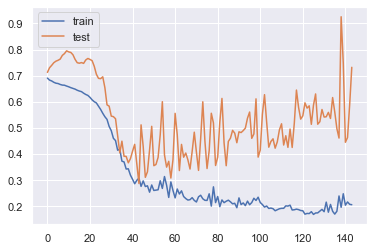

In [17]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# After implementing Early Stopping Concept, the epochs stop iterations at ~140 epochs. 
# So execution stops here as we have reached convergence.
# This saves us computation time and resources